In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [109]:
import io
%cd "C:\Users\hp\Desktop\Datasets"

C:\Users\hp\Desktop\Datasets


In [110]:
df_coup = pd.read_csv("in-vehicle-coupon-recommendation.csv")

In [111]:
df_coup

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [112]:
df_coup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [113]:
df_coup = df_coup.drop(["car","toCoupon_GEQ5min"], axis=1) ## Extreme missing Values

In [114]:
df_coup

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,1,0,1,0


In [115]:
for col in ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']:
    freq = df_coup[col].value_counts(dropna=False)
    print(freq)

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
NaN       107
Name: count, dtype: int64
CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
NaN       217
Name: count, dtype: int64
CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
NaN       151
Name: count, dtype: int64
RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
NaN       130
Name: count, dtype: int64
Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
NaN       189
Name: count, dtype: int64


In [116]:
for col in ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']:
    df_coup[col] = df_coup[col].fillna(df_coup[col].value_counts().idxmax())

In [117]:
# EDA
# Frequency Counts and pie of Y, gender, destination, coupon,expiration, income
# Cross Tabulation and Stacked Plots for Y & gender, Y & coupon, Y & income, Y & expiration

In [118]:
# Hypothesis Testing
# Test Null No Association between Y and gender
# Test Null No Association between Y and destination
# Test Null No Association between Y and coupon
# Test Null No Association between gender and coupon
# Test Null No Association between income and gender

<Axes: ylabel='count'>

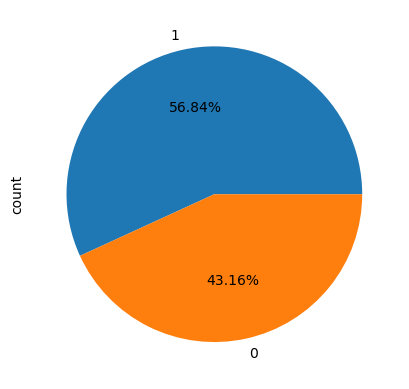

In [119]:
df_coup.Y.value_counts().plot(kind="pie",autopct="%.2f%%")

<Axes: ylabel='count'>

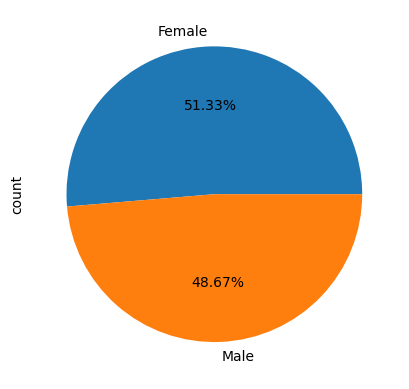

In [120]:
df_coup.gender.value_counts().plot(kind="pie",autopct="%.2f%%")

<Axes: ylabel='count'>

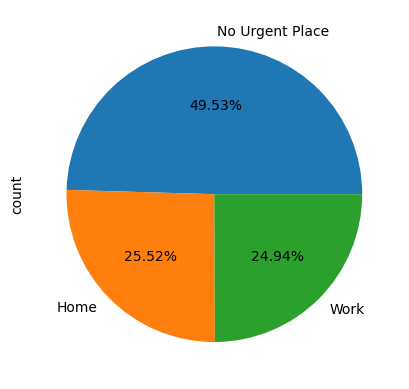

In [121]:
df_coup.destination.value_counts().plot(kind="pie",autopct="%.2f%%")

<Axes: ylabel='count'>

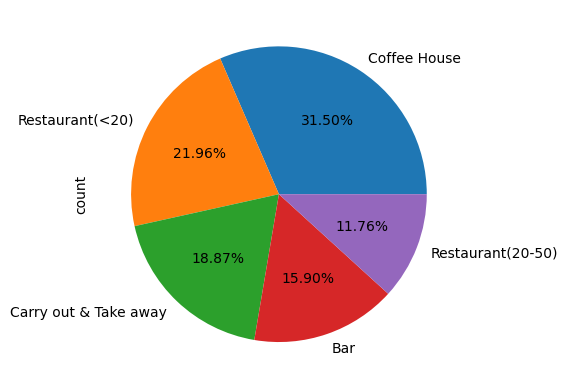

In [122]:
df_coup.coupon.value_counts().plot(kind="pie",autopct="%.2f%%")

<Axes: ylabel='count'>

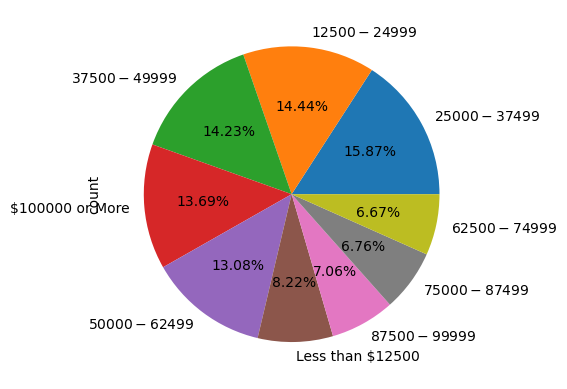

In [123]:
df_coup.income.value_counts().plot(kind="pie",autopct="%.2f%%")

<Axes: ylabel='count'>

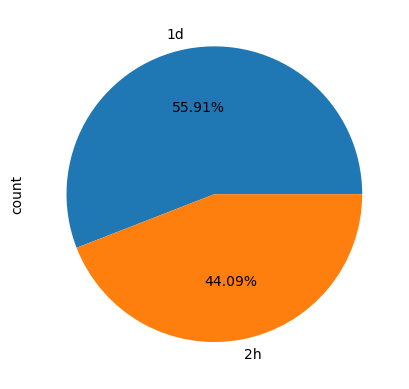

In [124]:
df_coup.expiration.value_counts().plot(kind="pie",autopct="%.2f%%")

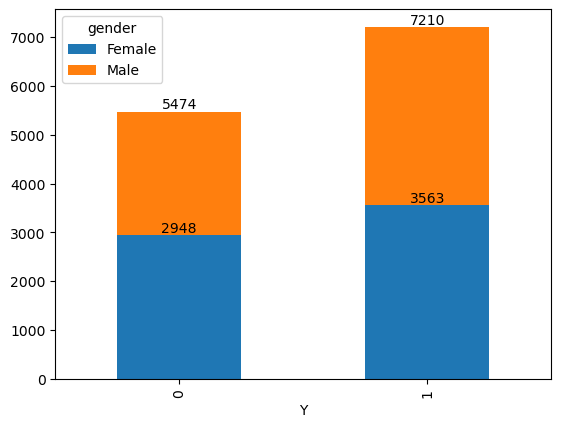

In [125]:
ax=pd.crosstab(df_coup.Y, df_coup.gender).plot(kind="bar",stacked=True)
for i in ax.containers: 
    ax.bar_label(i)

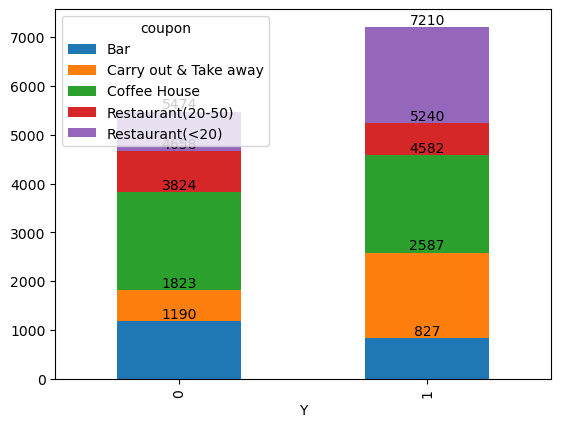

In [126]:
ax=pd.crosstab(df_coup.Y, df_coup.coupon).plot(kind="bar",stacked=True)
for i in ax.containers:
    ax.bar_label(i)

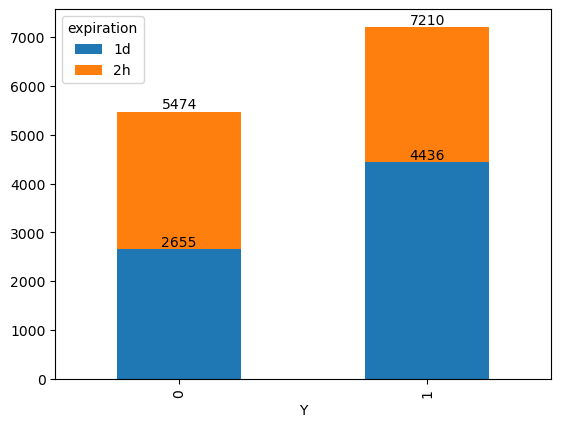

In [127]:
ax=pd.crosstab(df_coup.Y, df_coup.expiration).plot(kind="bar",stacked=True)
for i in ax.containers:
    ax.bar_label(i)

In [128]:
from scipy.stats import chi2_contingency

In [129]:
# Test Null No Association between Y and gender
pd.crosstab(df_coup.Y, df_coup.gender)

gender,Female,Male
Y,,
0,2948,2526
1,3563,3647


In [130]:
chi2_contingency(pd.crosstab(df_coup.Y, df_coup.gender))
# Since  pvalue=8.05552865589407e-07 is less than 0.05, Reject Null
# Null - No Assocaition between both variables

Chi2ContingencyResult(statistic=24.344527038622925, pvalue=8.05552865589407e-07, dof=1, expected_freq=array([[2809.93487859, 2664.06512141],
       [3701.06512141, 3508.93487859]]))

In [131]:
# Test Null No Association between Y and destination
chi2_contingency(pd.crosstab(df_coup.Y, df_coup.destination))
# Since pvalue=8.40265678045787e-48 is less than 0.05, Reject Null

Chi2ContingencyResult(statistic=216.79107304896826, pvalue=8.40265678045787e-48, dof=2, expected_freq=array([[1396.98344371, 2711.53752759, 1365.4790287 ],
       [1840.01655629, 3571.46247241, 1798.5209713 ]]))

In [132]:
# Test Null No Association between Y and coupon
chi2_contingency(pd.crosstab(df_coup.Y, df_coup.coupon))
# Since pvalue=8.575341747082738e-188 is less than 0.05, Reject Null

Chi2ContingencyResult(statistic=873.6378240374827, pvalue=8.575341747082738e-188, dof=4, expected_freq=array([[ 870.47130243, 1032.7406181 , 1724.54304636,  643.89845475,
        1202.34657837],
       [1146.52869757, 1360.2593819 , 2271.45695364,  848.10154525,
        1583.65342163]]))

In [133]:
# Test Null No Association between gender and coupon
chi2_contingency(pd.crosstab(df_coup.gender, df_coup.coupon))
# Since pvalue=0.923446 is greater than 0.05, Fail to Reject Null

Chi2ContingencyResult(statistic=0.9077464226449882, pvalue=0.9234468480222715, dof=4, expected_freq=array([[1035.37425102, 1228.38402712, 2051.24219489,  765.87921791,
        1430.12030905],
       [ 981.62574898, 1164.61597288, 1944.75780511,  726.12078209,
        1355.87969095]]))

In [134]:
# Test Null No Association between gender and income
chi2_contingency(pd.crosstab(df_coup.gender, df_coup.income))
# Since pvalue=1.6688064349766156e-59 is less than 0.05, Reject Null

Chi2ContingencyResult(statistic=297.1442463179497, pvalue=1.6688064349766156e-59, dof=8, expected_freq=array([[ 891.13024283,  939.89601072, 1033.32095553,  926.54959003,
         851.60430464,  434.27199622,  439.91855881,  459.42486597,
         534.88347524],
       [ 844.86975717,  891.10398928,  979.67904447,  878.45040997,
         807.39569536,  411.72800378,  417.08144119,  435.57513403,
         507.11652476]]))

In [135]:
# Split Data into y and X
y = df_coup.Y
X = df_coup.drop('Y',axis=1)

In [136]:
from sklearn.preprocessing import LabelEncoder

In [137]:
X = X.astype(str).apply(LabelEncoder().fit_transform)

In [138]:
X

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,1,0,2,1,2,4,0,0,0,3,...,3,4,4,0,1,0,0,0,0,1
1,1,1,2,2,0,2,1,0,0,3,...,3,4,4,0,1,0,0,0,0,1
2,1,1,2,2,0,1,1,0,0,3,...,3,4,4,0,1,0,1,0,0,1
3,1,1,2,2,2,2,1,0,0,3,...,3,4,4,0,1,0,1,0,0,1
4,1,1,2,2,2,2,0,0,0,3,...,3,4,4,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,3,0,1,3,1,0,1,1,2,...,6,4,4,0,1,0,0,0,1,0
12680,2,0,0,1,4,1,0,1,1,2,...,6,4,4,0,1,0,0,0,0,1
12681,2,0,1,0,4,2,0,1,1,2,...,6,4,4,0,1,0,0,0,1,0
12682,2,0,1,0,4,0,0,1,1,2,...,6,4,4,0,1,0,1,1,0,1


In [139]:
y = LabelEncoder().fit_transform(y)

In [140]:
y

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

### Logistic Regression

In [141]:
from sklearn.linear_model import LogisticRegression

In [142]:
logm = LogisticRegression()

In [143]:
logm

LogisticRegression()

In [144]:
logm.fit(X,y)

LogisticRegression()

In [145]:
logm.score(X,y)

0.6295332702617471

### Decision Tree Classifier

In [146]:
from sklearn.tree import DecisionTreeClassifier

In [147]:
dtm = DecisionTreeClassifier(max_depth=8)

In [148]:
dtm

DecisionTreeClassifier(max_depth=8)

In [149]:
dtc_m = dtm.fit(X,y)

In [150]:
dtc_m

DecisionTreeClassifier(max_depth=8)

In [151]:
dtc_m.score(X,y)

0.7444812362030905

### Applying cross validation on Decision Tree

In [152]:
from sklearn.model_selection import cross_val_score

In [153]:
cross_val_score(dtm, X,y)

array([0.6791486 , 0.7177769 , 0.66022862, 0.65549862, 0.63130915])

In [154]:
np.mean([0.6779661 , 0.71698857, 0.66062278, 0.65155696, 0.63367508])

0.6681618979999999

### Random Forest Classifier

In [155]:
from sklearn.ensemble import RandomForestClassifier

In [156]:
rfcm = RandomForestClassifier(n_estimators=1000, max_depth=8)

In [157]:
rfcm

RandomForestClassifier(max_depth=8, n_estimators=1000)

In [158]:
rfcmodel = rfcm.fit(X,y)

In [159]:
rfcmodel

RandomForestClassifier(max_depth=8, n_estimators=1000)

In [160]:
rfcmodel.score(X,y)

0.7593818984547461

### Applying Cross Validation for Random forest 

In [161]:
cross_val_score(rfcm, X,y)

array([0.67875443, 0.68584943, 0.67954277, 0.66850611, 0.69321767])

In [162]:
np.mean([0.6779661 , 0.68624359, 0.67599527, 0.67126527, 0.69755521])

0.6818050880000001

###  Gradient Boosting Classifier

In [163]:
from sklearn.ensemble import GradientBoostingClassifier

In [164]:
gbm = GradientBoostingClassifier(n_estimators=1000, max_depth=8)

In [165]:
gbm

GradientBoostingClassifier(max_depth=8, n_estimators=1000)

In [166]:
gbmmodel = gbm.fit(X,y)

In [167]:
gbmmodel

GradientBoostingClassifier(max_depth=8, n_estimators=1000)

In [168]:
gbmmodel.score(X,y)

0.9981866918953012

In [169]:
log_pre = logm.predict(X)

In [170]:
dtc_pre = dtc_m.predict(X)

In [171]:
rfc_pre = rfcmodel.predict(X)

In [172]:
gbm_pre = gbmmodel.predict(X)

### Evaluating the metrics 

In [173]:
from sklearn.metrics import RocCurveDisplay, classification_report

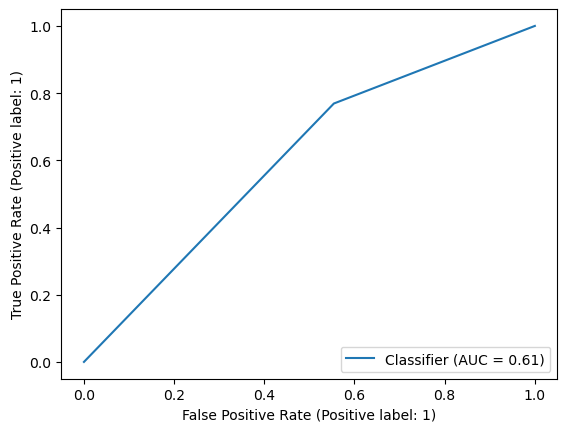

In [174]:
RocCurveDisplay.from_predictions(y, log_pre)

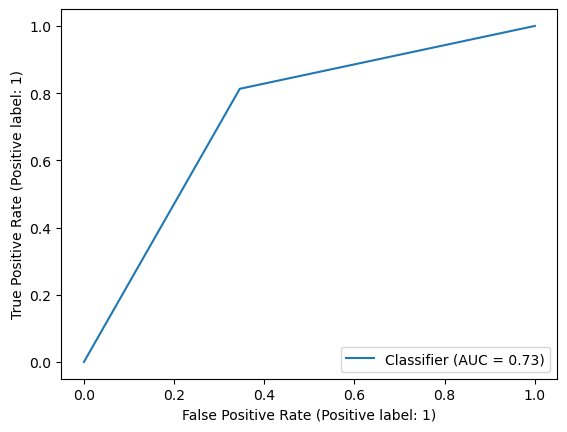

In [175]:
RocCurveDisplay.from_predictions(y, dtc_pre)

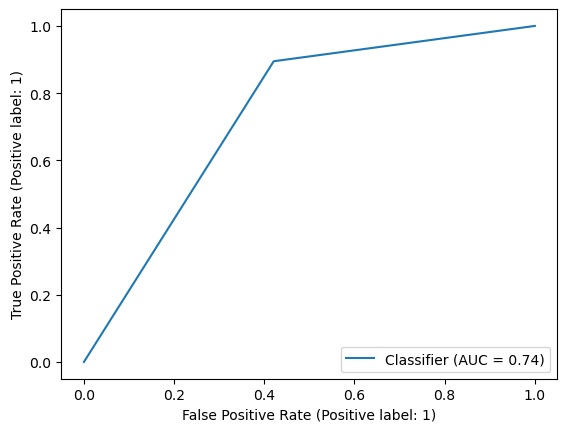

In [176]:
RocCurveDisplay.from_predictions(y,rfcm_pre)

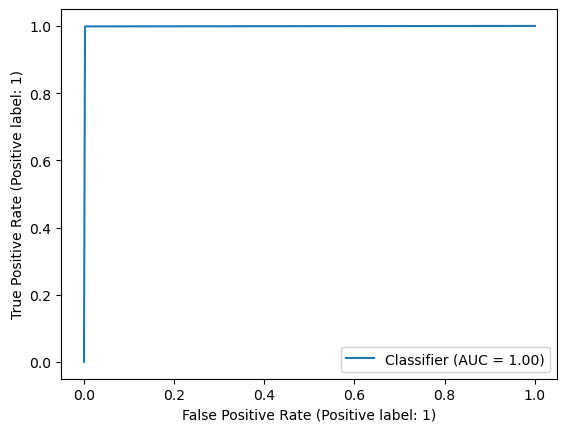

In [177]:
RocCurveDisplay.from_predictions(y, gbm_pre)

In [178]:
import pickle

In [179]:
pickle.dump(gbmmodel,open('gbmmodel.pkl', 'wb')) ### wb indicates write 

In [180]:
pkl_model = pickle.load(open('gbmmodel.pkl', 'rb'))  ### rb indiactes read 